<img src="images/escoladeadmcabecalho.png" alt="Escola de Administração UFPR" style="width:600px;height:200px;">

## **Process Mining - PPGMNE:**  

### Taks

* Programa de Pós-Graduação em Métodos Numéricos em Engenharia (PPGMNE)

Disciplina: Process Mining
Prof.: Eduardo Alves Portela Santos

Exercício – Redes de Petri e Algoritmo Alpha 

1) Considere o seguinte log de eventos. Utilize o algoritmo  para descobrir o modelo correspondente em rede de Petri.
W = ABDEHJ, ABEDHJ, ABEDHGCFJ, ABEDHGBDEHJ, ACFJ, ACFGCFJ.

2) Considere a rede de Petri a seguir:

<img src="images/processmining.png" alt="Rede de Petri" style="width:400px;height:200px;">

* i) Obtenha o log de eventos completo para esta rede.

* ii) Utilize o algoritmo  para reconstruir a rede.

3) O seguinte log de eventos foi obtido de um sistema de informação: 	
DA G F B C
D A H F B I A G F B C
E A F H B I A F H B C
E A F G B C 
E A H F B C

* i) Utilize o algoritmo  para descobrir o modelo correspondente em rede de Petri.

* ii) Considere que a atividade H é invisível, ou seja, ela não é registrada no log. Utilize novamente o algoritmo  para verificar se é possível descobrir o modelo. Explique o resultado.

---

In [1]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.petri_net.util import performance_map 

In [2]:
traces = [
    "ABDEHJ",
    "ABEDHJ",
    "ABEDHGCFJ",
    "ABEDHGBDEHJ",
    "ACFJ",
    "ACFGCFJ"
]

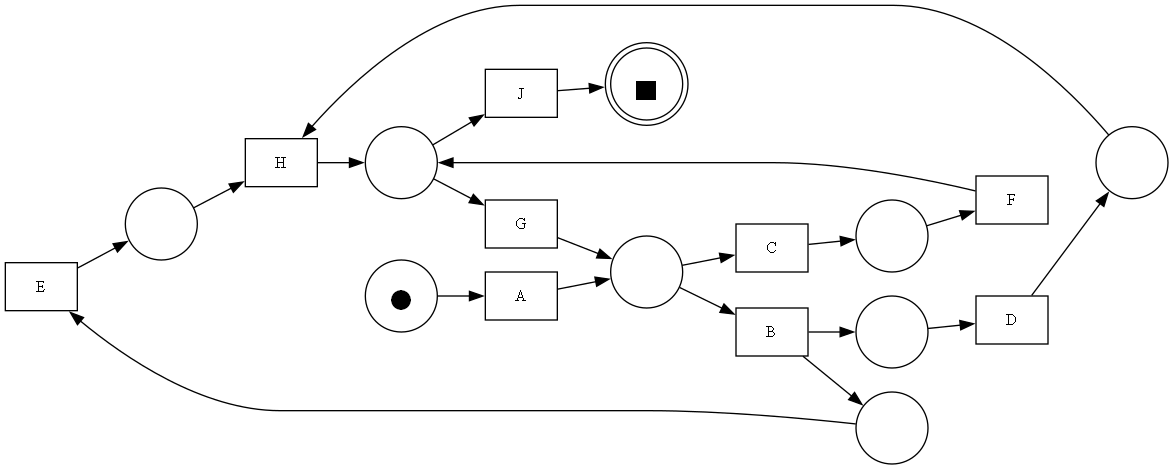

In [3]:
from pm4py.objects.log.obj import EventLog, Trace, Event
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# func p criar o log de eventos a partir das sequências
def create_event_log(traces):
    log = EventLog()
    for trace_str in traces:
        trace = Trace()
        for event_name in trace_str:
            trace.append(Event({"concept:name": event_name}))
        log.append(trace)
    return log

if __name__ == "__main__":
    traces = [
        "ABDEHJ",
        "ABEDHJ",
        "ABEDHGCFJ",
        "ABEDHGBDEHJ",
        "ACFJ",
        "ACFGCFJ"
    ]
    
    event_log = create_event_log(traces)
    event_log = log_converter.apply(event_log)
    net, initial_marking, final_marking = alpha_miner.apply(event_log)
    gviz = pn_visualizer.apply(net, initial_marking, final_marking)
    pn_visualizer.view(gviz)
    pn_visualizer.save(gviz, "petri_net_questao1.png")


3) O seguinte log de eventos foi obtido de um sistema de informação:</br>
DA G F B C</br>
D A H F B I A G F B C</br>
E A F H B I A F H B C</br>
E A F G B C </br>
E A H F B C</br>



i) Utilize o algoritmo  para descobrir o modelo correspondente em rede de Petri.

In [4]:
traces = [
    "DAGFBC",
    "DAHFBIAGFBC",
    "EAFHBIAFHBC",
    "EAFGBC",
    "EAHFBC"
]

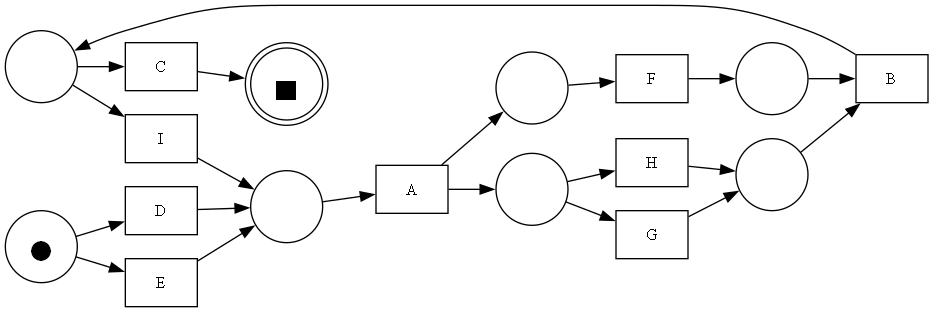

In [5]:
if __name__ == "__main__":
    traces = [
        "DAGFBC",
        "DAHFBIAGFBC",
        "EAFHBIAFHBC",
        "EAFGBC",
        "EAHFBC"
    ]
    
    event_log = create_event_log(traces)
    event_log = log_converter.apply(event_log)
    net, initial_marking, final_marking = alpha_miner.apply(event_log)
    gviz = pn_visualizer.apply(net, initial_marking, final_marking)
    pn_visualizer.view(gviz)
    pn_visualizer.save(gviz, "petri_net_questao3_i.png")


ii) Considere que a atividade H é invisível, ou seja, ela não é registrada no log. Utilize novamente o algoritmo  para verificar se é possível descobrir o modelo. Explique o resultado.

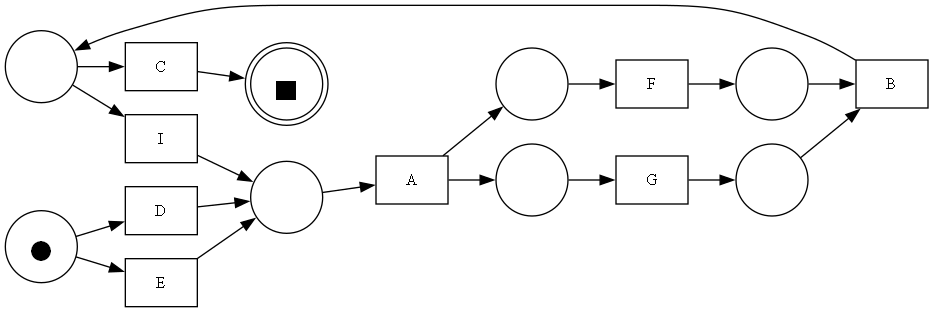

In [10]:
# Func para remover a atividade 'H' do log 
def remove_activity(log, activity):
    new_log = []
    for trace in log:
        new_trace = trace.replace(activity, "") 
        new_log.append(new_trace)
    return new_log

# Questão 3(ii): Reaplicar o Algoritmo Alpha com a atividade 'H' invisível
if __name__ == "__main__":
    traces = [
        "DAGFBC",
        "DAHFBIAGFBC",
        "EAFHBIAFHBC",
        "EAFGBC",
        "EAHFBC"
    ]
    
    traces_no_h = remove_activity(traces, "H")
    # log de eventos sem a atividade 'H'
    event_log = create_event_log(traces_no_h)
    event_log = log_converter.apply(event_log)
    
    # Aplicação do Algoritmo Alpha 
    net, initial_marking, final_marking = alpha_miner.apply(event_log)
    # rede de Petri sem o 'H'
    gviz = pn_visualizer.apply(net, initial_marking, final_marking)
    pn_visualizer.view(gviz)

    pn_visualizer.save(gviz, "petri_net_questao3_ii.png")


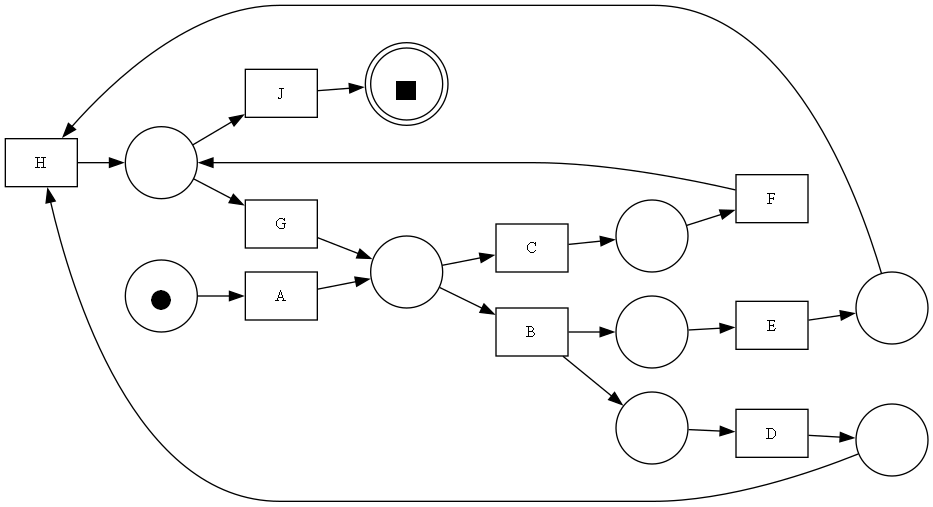

In [7]:
#funcao de log de eventos a partir de uma lista de strings
def create_event_log(traces):
    log = EventLog()
    for trace_str in traces:
        trace = Trace()
        for event_name in trace_str:
            trace.append(Event({"concept:name": event_name}))
        log.append(trace)
    return log

if __name__ == "__main__":

    traces = ["ABDEHJ","ABEDHJ","ABEDHGCFJ","ABEDHGBDEHJ","ACFJ","ACFGCFJ"]

    event_log = create_event_log(traces)
    
    event_log = log_converter.apply(event_log)
    
    # algoritmo Alpha para descobrir a rede de Petri
    net, initial_marking, final_marking = alpha_miner.apply(event_log)
    
    # Viz de de Petri
    gviz = pn_visualizer.apply(net, initial_marking, final_marking)
    pn_visualizer.view(gviz)

    pn_visualizer.save(gviz, "petri_net.png")
